## Pybonacci
#### Cálculo e exibição da sequência de Fibonacci utilizando *Python*

In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
get_cmap = matplotlib.colormaps.get_cmap

Primeiramente, definimos a sequência de Fibonacci com $n$ termos.

In [2]:
def seq_fibonacci(n):
    sfib = [1,1]
    
    if n <= 0:
        return "Erro! Considere n >0!"
    
    elif n == 1:
        return [1]
    
    else:
        for i in range(n-2):
            phi = sfib[i] + sfib[i+1]
            sfib.append(phi)
        return sfib

Podemos plotá-la como um gráfico de barras para visualização inicial.

In [3]:
def bar_fibonacci(n):
    sfib = seq_fibonacci(n)
    plt.bar(range(n), sfib, color = "gold")
    plt.yticks(sfib)
    plt.xlabel("Índice")
    plt.ylabel("Sequência de Fibonacci")
    plt.title(f"Sequência de Fibonacci para {n} números")
    plt.grid();

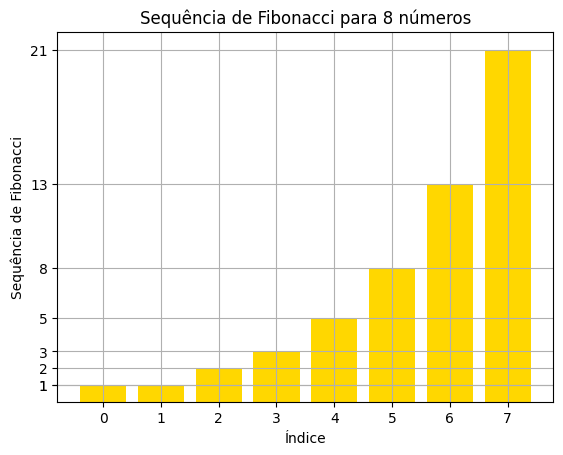

In [4]:
bar_fibonacci(8)

Uma das propriedades mais populares desta sequência, é que a razão entre dois números sequênciados se aproxima do número de ouro $\varphi = \frac{1 + \sqrt5}{2} \approx 1.618$ conforme se avança na sequência. Essa propriedade também pode ser exibida em forma gráfica.

In [5]:
def calc_prop_aurea(n):
    sfib = seq_fibonacci(n)
    p_aur = [sfib[i+1]/sfib[i] for i in range(n-1)]
    return p_aur

def plota_prop_aurea(n):
    p_aur = calc_prop_aurea(n)
    phi = (1+5**(1/2))/2
    index_ratio = [round(i/(i+1), 3) for i in range(n-1)]
    
    plt.plot(range(n-1), p_aur, color = "gold", marker=".", zorder=3, label="Sequência de Fibonacci")
    plt.axhline(y=phi, linestyle = "--", color = "r", zorder=2, label = f"Razão áurea = {round(phi,3)}")
    plt.title(f"Proporção Áurea na Sequência de fibonacci para {n} números")
    plt.xlabel("Razão dos índices dos termos na s. Fibonacci"); plt.ylabel("Proporção Áurea")
    plt.xticks(range(n-1), index_ratio); plt.ylim(0,3); plt.legend(); plt.grid(zorder=1);

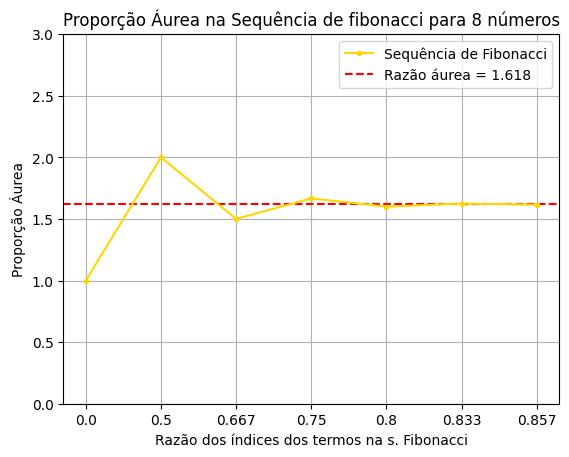

In [6]:
plota_prop_aurea(8)

Também é possível exibir a característica espiral de Fibonacci.

In [7]:
def quart_circunf(P1, P2, sentido="horario", n=200):
    """
    Gera pontos de um arco de 1/4 de circunferência entre P1 e P2.

    P1, P2: tuplas (x, y)
    sentido: "horario" ou "antihorario"
    n: número de pontos no arco
    """
    x1, y1 = P1
    x2, y2 = P2

    # Vetor entre os pontos
    vx = x2 - x1
    vy = y2 - y1
    d = math.hypot(vx, vy)

    # Para formar um arco de 90°, a corda vale R * sqrt(2)
    R = d / math.sqrt(2)

    # Vetor perpendicular normalizado
    if sentido == "horario":
        nx, ny =  vy / d, -vx / d
    else:
        nx, ny = -vy / d,  vx / d

    # Centro do círculo
    # O centro fica deslocado da metade da corda por uma distância R/√2 na direção normal
    cx = (x1 + x2)/2 + nx * (R / math.sqrt(2))
    cy = (y1 + y2)/2 + ny * (R / math.sqrt(2))

    # Ângulos iniciais e finais
    ang1 = math.atan2(y1 - cy, x1 - cx)
    ang2 = math.atan2(y2 - cy, x2 - cx)

    # Ajusta para garantir 90°
    if sentido == "horario":
        if ang2 > ang1:
            ang2 -= 2*math.pi
    else:
        if ang2 < ang1:
            ang2 += 2*math.pi

    # Gera os pontos do arco
    arco = []
    for i in range(n+1):
        t = ang1 + (ang2 - ang1) * (i/n)
        x = cx + R * math.cos(t)
        y = cy + R * math.sin(t)
        arco.append((x, y))

    return arco

In [8]:
def plota_espir_aurea(n):
    sfib = seq_fibonacci(n)
    x_total = []
    y_total = []
    
    if n%2 == 1:
        plt.figure(figsize = (5, 8))
    else: 
        plt.figure(figsize = (8, 5))
        
    cmap = get_cmap("gist_rainbow").resampled(n)
        
    for i in range(len(sfib)):
        
        if i == 0:
            p1_local = [0,0]
            p2_local = [1,1]   
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            x_total.append(xarco)
            y_total.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))
            
            
        elif i%4 == 1:
            p1_local = p2_local
            p2_local = [p1_local[0]+sfib[i], p1_local[1]-sfib[i]]   
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            x_total.append(xarco)
            y_total.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))

            
        elif i%4 == 2:            
            p1_local = p2_local
            p2_local = [p1_local[0]-sfib[i], p1_local[1]-sfib[i]]  
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            x_total.append(xarco)
            y_total.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))

            
        elif i%4 == 3:            
            p1_local = p2_local
            p2_local = [p1_local[0]-sfib[i], p1_local[1]+sfib[i]]  
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            x_total.append(xarco)
            y_total.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))
            
        
        elif i%4 == 0 and i != 0:
            p1_local = p2_local
            p2_local = [p1_local[0]+sfib[i], p1_local[1]+sfib[i]]  
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            x_total.append(xarco)
            y_total.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))
            
            
    plt.title(f"Espiral de Fibonacci com {n} números")
    plt.grid();
    
    x_total = np.array(x_total).flatten().tolist()
    y_total = np.array(y_total).flatten().tolist()
    
    return x_total, y_total

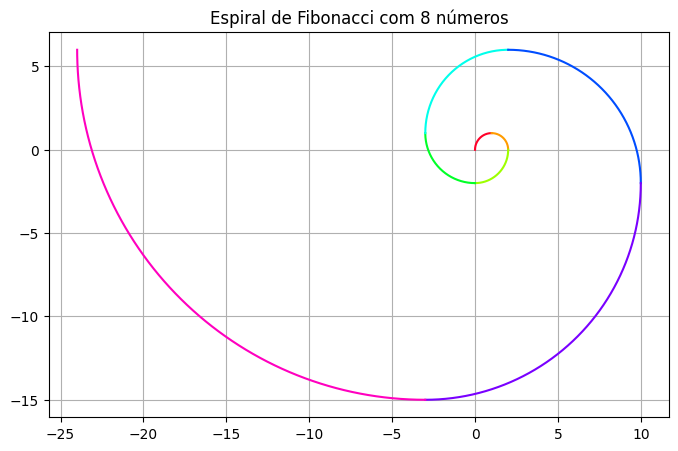

In [9]:
x,y  = plota_espir_aurea(8)

O mesmo é válido para o retângulo de Fibonacci.

In [10]:
def plota_ret_aureo(n):

    sfib = seq_fibonacci(n)
    x_total = []
    y_total = []
    
    if n%2 == 1:
        plt.figure(figsize = (5, 8))
    else: 
        plt.figure(figsize = (8, 5))
        
    cmap = get_cmap("gist_rainbow").resampled(n)
        
    for i in range(len(sfib)):
        
        if i == 0:
            p1_local = [0,0]
            p2_local = [1,1]   
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            x_total.append(xquad)
            y_total.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)
            
            
        elif i%4 == 1:
            p1_local = p2_local
            p2_local = [p1_local[0]+sfib[i], p1_local[1]-sfib[i]]   
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            x_total.append(xquad)
            y_total.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)

            
        elif i%4 == 2:            
            p1_local = p2_local
            p2_local = [p1_local[0]-sfib[i], p1_local[1]-sfib[i]]  
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            x_total.append(xquad)
            y_total.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)

            
        elif i%4 == 3:            
            p1_local = p2_local
            p2_local = [p1_local[0]-sfib[i], p1_local[1]+sfib[i]]  
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            x_total.append(xquad)
            y_total.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)
            
        
        elif i%4 == 0 and i != 0:
            p1_local = p2_local
            p2_local = [p1_local[0]+sfib[i], p1_local[1]+sfib[i]]  
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            x_total.append(xquad)
            y_total.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)
            
            
    plt.title(f"Retângulo de Fibonacci com {n} números")
    plt.grid();
    
    x_total = np.array(x_total).flatten().tolist()
    y_total = np.array(y_total).flatten().tolist()
    
    return x_total, y_total

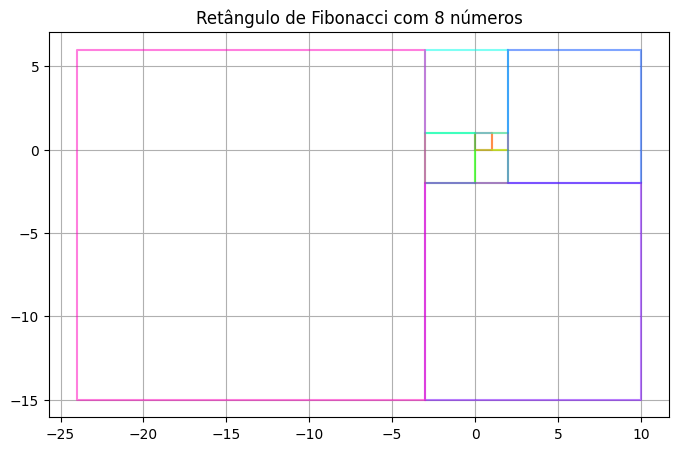

In [11]:
x,y = plota_ret_aureo(8)

Sendo ambas as representações geométricas relacionadas em sua formação, podemos plotar ambas simultaneamente.

In [12]:
def plota_fibonacci(n):

    sfib = seq_fibonacci(n)
    xt_arco = []
    yt_arco = []
    xt_quad = []
    yt_quad = []
    
    if n%2 == 1:
        plt.figure(figsize = (5, 8))
    else: 
        plt.figure(figsize = (8, 5))
        
    cmap = get_cmap("gist_rainbow").resampled(n)
        
    for i in range(len(sfib)):
        
        if i == 0:
            p1_local = [0,0]
            p2_local = [1,1]   
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            xt_arco.append(xarco)
            yt_arco.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            xt_quad.append(xquad)
            yt_quad.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)
            
            
        elif i%4 == 1:
            p1_local = p2_local
            p2_local = [p1_local[0]+sfib[i], p1_local[1]-sfib[i]]   
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            xt_arco.append(xarco)
            yt_arco.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            xt_quad.append(xquad)
            yt_quad.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)
            
            
        elif i%4 == 2:            
            p1_local = p2_local
            p2_local = [p1_local[0]-sfib[i], p1_local[1]-sfib[i]]  
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            xt_arco.append(xarco)
            yt_arco.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            xt_quad.append(xquad)
            yt_quad.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)
            
            
        elif i%4 == 3:            
            p1_local = p2_local
            p2_local = [p1_local[0]-sfib[i], p1_local[1]+sfib[i]]  
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            xt_arco.append(xarco)
            yt_arco.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            xt_quad.append(xquad)
            yt_quad.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)
            
        
        elif i%4 == 0 and i != 0:
            p1_local = p2_local
            p2_local = [p1_local[0]+sfib[i], p1_local[1]+sfib[i]]  
            
            arco = quart_circunf(p1_local,p2_local)
            xarco = [p[0] for p in arco]
            yarco = [p[1] for p in arco]
            
            xt_arco.append(xarco)
            yt_arco.append(yarco)
            
            plt.plot(xarco, yarco, color = cmap(i))
            
            xquad = [p1_local[0], p1_local[0], p2_local[0], p2_local[0], p1_local[0]]
            yquad = [p1_local[1], p2_local[1], p2_local[1], p1_local[1], p1_local[1]]
            
            xt_quad.append(xquad)
            yt_quad.append(yquad)
            
            plt.plot(xquad, yquad, color = cmap(i), alpha = 0.5)
            
            
    plt.title(f"Sequência de Fibonacci com {n} números")
    plt.grid();
    
    xt_arco = np.array(xt_arco).flatten().tolist()
    yt_arco = np.array(yt_arco).flatten().tolist()
    xt_quad = np.array(xt_quad).flatten().tolist()
    yt_quad = np.array(yt_quad).flatten().tolist()
    
    return xt_arco, yt_arco, xt_quad, yt_quad

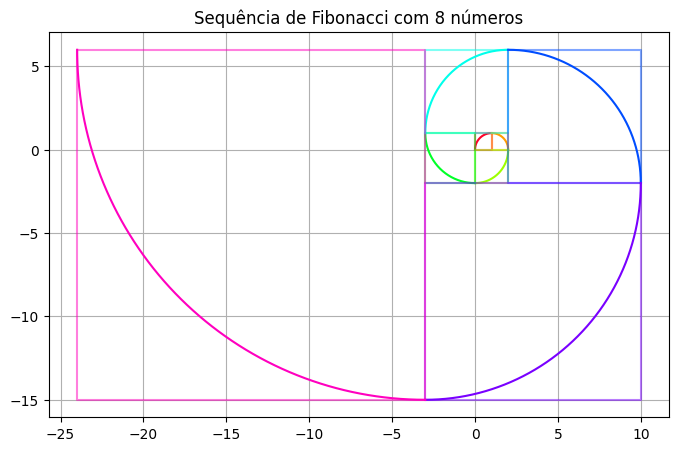

In [13]:
plots = plota_fibonacci(8)

Note que podemos plotar diretamente pela função, mas também recuperar as informações da figura e plotá-la separadamente de forma personalizada.

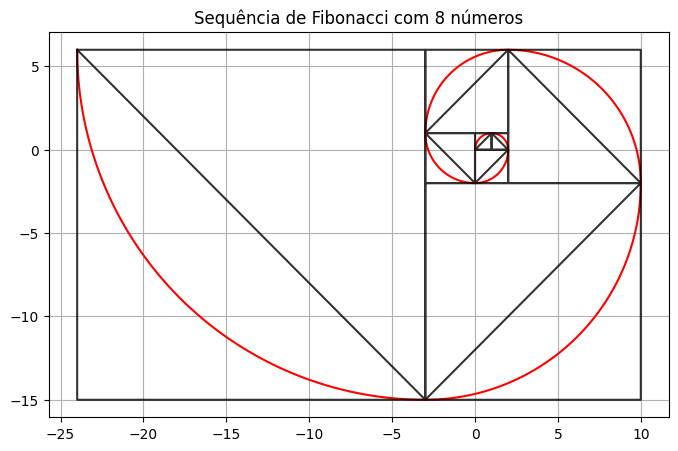

In [14]:
xc, yc, xq, yq = plots
plt.figure(figsize=(8,5))
plt.plot(xc,yc, color = "r")
plt.plot(xq+[xq[-3]],yq+[yq[-3]], color = "black", alpha = 0.8)
plt.title("Sequência de Fibonacci com 8 números")
plt.grid();